<a href="https://colab.research.google.com/github/Suratan63011017/DataStructures-And-Algorithm-Grader/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install tensorflow==2.9
!pip install scikit-learn
!pip install tqdm

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [3]:
import cv2
import numpy as np

In [4]:
image = cv2.imread("Focuss.jpg")
image = cv2.resize(image, (400,600))

In [5]:
reduce_factors = [2, 8, 15]
scale_factors = [1 / factor for factor in reduce_factors]

inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
inter_texts = ["INTER_NEAREST", "INTER_LINEAR", "INTER_CUBIC", "INTER_AREA"]

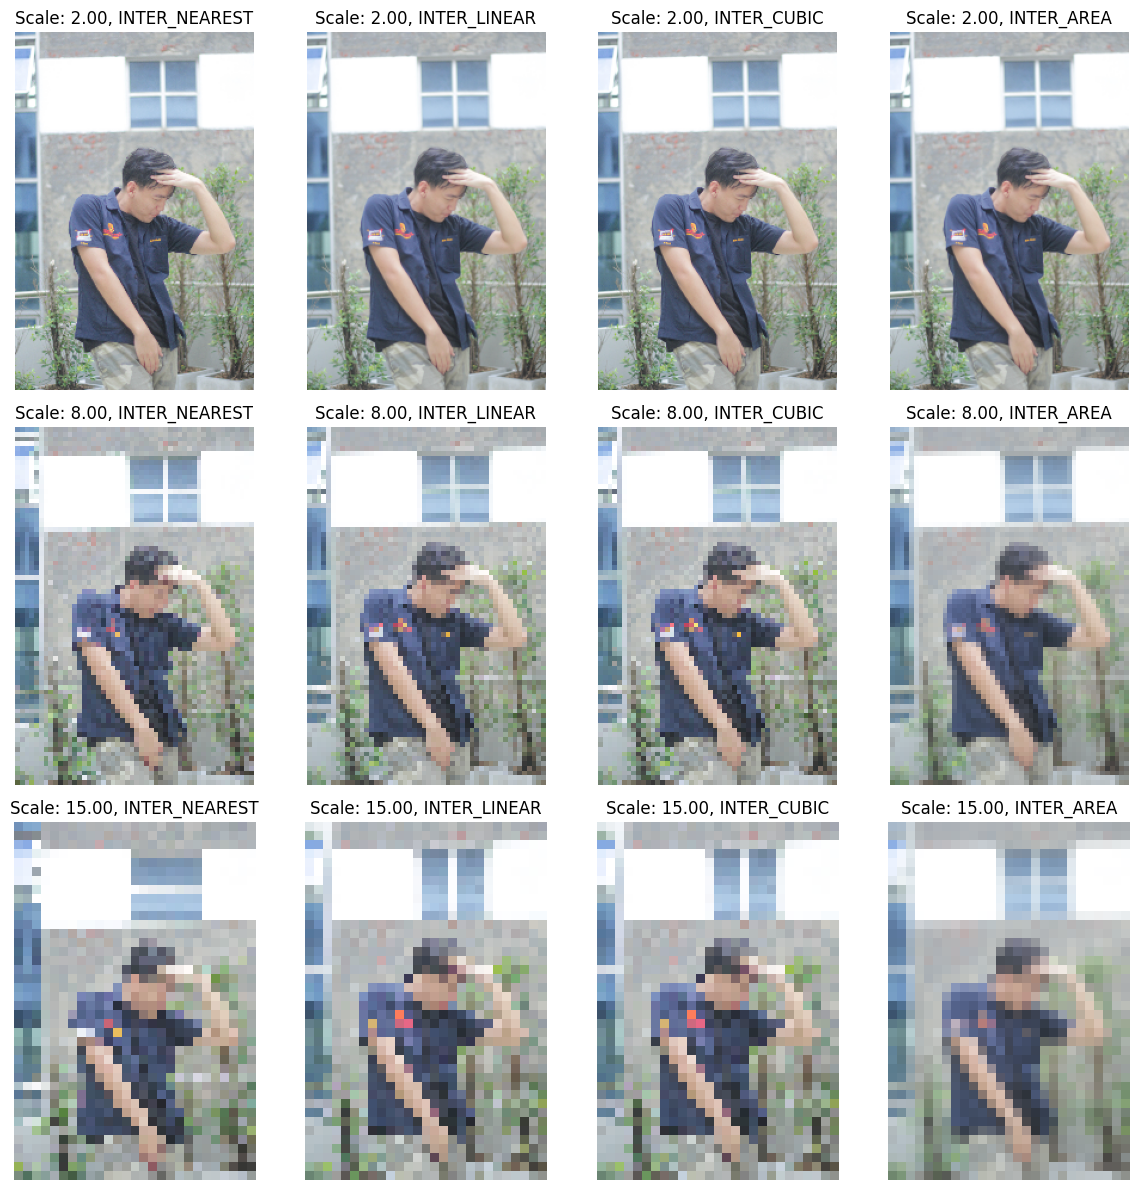

In [6]:
# Create a 4x4 grid to display the resized images
fig, axs = plt.subplots(len(reduce_factors), len(inter_methods), figsize=(12, 12))

# Iterate through each combination of scale factors and interpolation methods
for i, scale_factor in enumerate(scale_factors):
    for j, inter_method in enumerate(inter_methods):
        # Resize the image using the current scale factor and interpolation method
        resized_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=inter_method)

        # Display the resized image using Matplotlib
        axs[i, j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        axs[i, j].set_title(f"Scale: {1/scale_factor:.2f}, {inter_texts[j]}")
        axs[i, j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [7]:
image = cv2.imread("Focuss.jpg")
image = cv2.resize(image, (400,600))

In [8]:
def add_noise(image):
    noise_mean = 0
    noise_std = 10
    noise_factor = 5
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    # print(noisy_image.shape)
    # print(type(noisy_image))
    return noisy_image

In [9]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping

# Define fill modes
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']
image = img_to_array(image)
# Create a list to store augmented images
augmented_images = []

# Loop through each fill mode
for fill_mode in fill_modes:
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        preprocessing_function=add_noise,
        fill_mode=fill_mode
    )

    # Generate augmented images and add them to the list
    augmented_batch = datagen.flow(np.expand_dims(image, 0), batch_size=1)
    for i in range(1, 6):
        batch = augmented_batch.next()
        im_result = batch[0].astype('uint8') # choose first
        augmented_images.append(im_result)

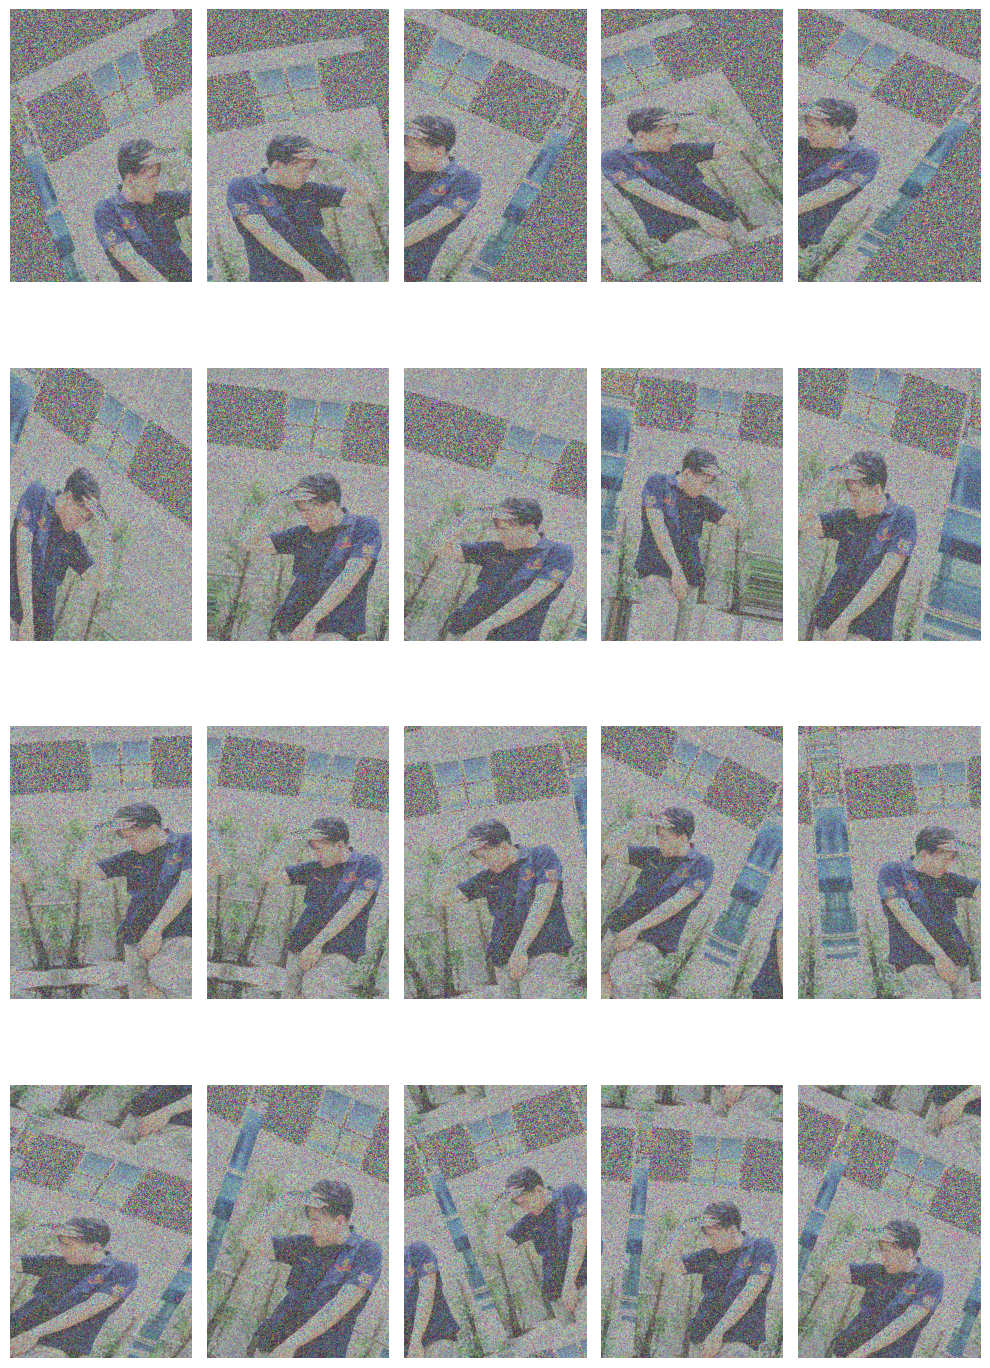

In [10]:
# Define the figure size (adjust as needed)
fig_width = 10
fig_height = 15

# Create a larger figure to display the augmented images
plt.figure(figsize=(fig_width, fig_height))

# Iterate through the augmented images and display them
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(4, len(fill_modes)+1, i + 1)  # Create a subplot for each image
    plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
len(augmented_images)

20

50000
10000
10000
50000
10000
10000
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


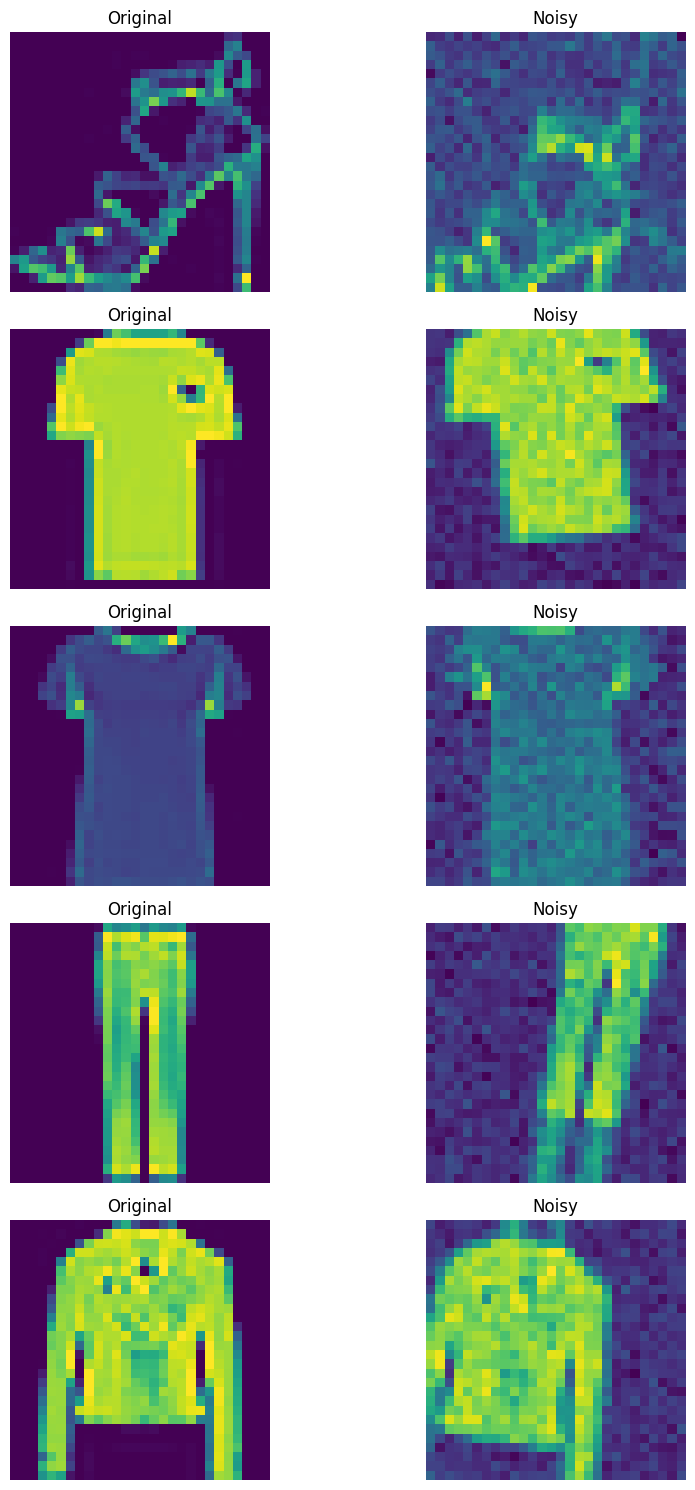

In [12]:
rotation_range = 30  # Degrees
width_shift_range = 0.2  # Fraction of total width
height_shift_range = 0.2  # Fraction of total height
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom range
horizontal_flip = True  # Allow horizontal flipping
fill_modes = ['constant', 'nearest', 'reflect', 'wrap']

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Split the training data into train, test, and validation sets
random_state = 42
test_size = 0.2
x_train, x_val = train_test_split(x_train, random_state=random_state, test_size=(1/6))
# x_test, x_val = train_test_split(x_test, random_state=random_state, test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))
# Prepare Gaussian Noise Function
def add_noise(image):
    noise_mean = 0
    noise_std = 0.3
    noise_factor = 0.2
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return noisy_image

noisy_x_train = []
noisy_x_val = []
noisy_x_test = []

# Define noise parameters

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=add_noise
)

# # Example usage of datagen to generate augmented images
# # This is typically used in a loop to generate batches of augmented images during training
# batch_size = 32
# augmented_images = datagen.flow(x_train.reshape(-1, 28, 28, 1), batch_size=batch_size)
# print(len(augmented_images))

# # Display the first 10 augmented images from the first batch
# for i in range(10):
#     augmented_image = augmented_images.next()
#     plt.figure(figsize=(2, 2))
#     plt.imshow(augmented_image[0].reshape(28, 28), cmap='viridis')
#     plt.axis('off')
#     plt.show()
# augmented_images = []

# Generate augmented images for each image in x_train
for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_train.append(augmented_image)
print(len(noisy_x_train))
for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_val.append(augmented_image)
print(len(noisy_x_val))

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    noisy_x_test.append(augmented_image)
print(len(noisy_x_test))

noisy_x_train = np.array(noisy_x_train)
noisy_x_train = np.squeeze(noisy_x_train)
noisy_x_val = np.array(noisy_x_val)
noisy_x_val = np.squeeze(noisy_x_val)
noisy_x_test = np.array(noisy_x_test)
noisy_x_test = np.squeeze(noisy_x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(noisy_x_train.shape)
print(noisy_x_val.shape)
print(noisy_x_test.shape)

num_rows = 5
num_cols = 2

# Create a figure and axis for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Loop through the pairs of original and noisy images
for i in range(num_rows):
    # Display the original image
    axes[i, 0].imshow(x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Display the noisy image
    axes[i, 1].imshow(noisy_x_train[i].reshape(28, 28), cmap='viridis')
    axes[i, 1].set_title('Noisy')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()



In [13]:
# noisy_x_train = np.array(noisy_x_train)
# noisy_x_train = np.squeeze(noisy_x_train)
# noisy_x_val = np.array(noisy_x_val)
# noisy_x_val = np.squeeze(noisy_x_val)
# noisy_x_test = np.array(noisy_x_test)
# noisy_x_test = np.squeeze(noisy_x_test)
# print(noisy_x_train.shape)
# print(noisy_x_val.shape)
# print(noisy_x_test.shape)

In [14]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [15]:
input_img = Input(shape=(28, 28, 1))
# Layer 1
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)

# Layer 2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)

# Layer 3
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer 4
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

x6 = UpSampling2D((2, 2))(x5)

x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)


x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)

# Layer 2
x9 = Conv2D(128, (3, 3), activation='relu', padding='same')(x8)
x10 = MaxPool2D((2, 2), strides=(2, 2))(x9)

# Layer 3
x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)

# Layer 4
x12 = Conv2D(64, (3, 3), activation='relu', padding='same')(x11)

x13 = UpSampling2D((2, 2))(x12)

x14 = Conv2D(128, (3, 3), activation='relu', padding='same')(x13)


x15 = Conv2D(256, (3, 3), activation='relu', padding='same')(x14)


x16 = Conv2D(1, (3, 3), activation='relu', padding='same')(x15)

# Create the autoencoder model
autoencoder = Model(input_img, x16)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(learning_rate=0.0003), loss='mse')

# Display the model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                             

In [16]:
callback = EarlyStopping(monitor='loss', patience=3)
history = autoencoder.fit(
    noisy_x_train,
    x_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(noisy_x_val, x_val),
    callbacks=[callback],
)

Epoch 1/100
196/196 [==============================] - 20s 83ms/step - loss: 0.0654 - val_loss: 0.0509
Epoch 2/100
196/196 [==============================] - 16s 79ms/step - loss: 0.0463 - val_loss: 0.0419
Epoch 3/100
196/196 [==============================] - 16s 79ms/step - loss: 0.0406 - val_loss: 0.0394
Epoch 4/100
196/196 [==============================] - 16s 79ms/step - loss: 0.0380 - val_loss: 0.0369
Epoch 5/100
196/196 [==============================] - 15s 79ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 6/100
196/196 [==============================] - 15s 79ms/step - loss: 0.0349 - val_loss: 0.0346
Epoch 7/100
196/196 [==============================] - 15s 79ms/step - loss: 0.0338 - val_loss: 0.0336
Epoch 8/100
196/196 [==============================] - 15s 79ms/step - loss: 0.0328 - val_loss: 0.0332
Epoch 9/100
196/196 [==============================] - 15s 79ms/step - loss: 0.0321 - val_loss: 0.0323
Epoch 10/100
196/196 [==============================] - 15s 79ms/step - l

In [17]:
predictions_test = autoencoder.predict(noisy_x_test)

313/313 [==============================] - 2s 5ms/step


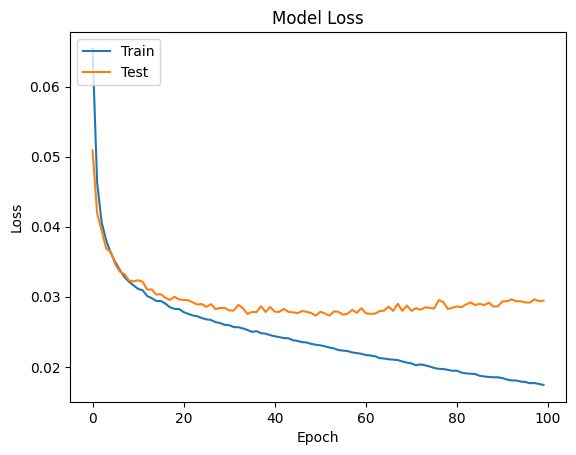

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

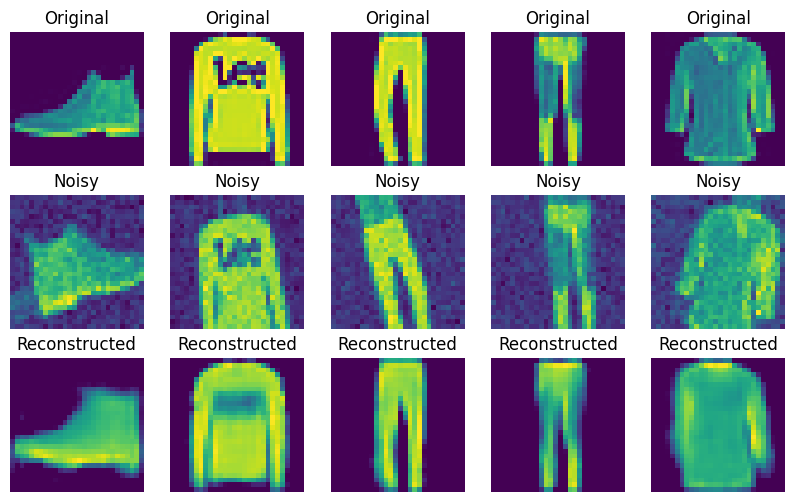

In [19]:

n = 5  # Number of images to display
plt.figure(figsize=(10, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_x_test[i])
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()